# SGD

## PyTorch Derivatives  (Gradients)

Pytorch has a built in way to calculate gradients. So, we don't need to worry about those calculus :D 

Let's study that.

In [213]:
from fastai2.vision.all import *
from utils import *

matplotlib.rc('image', cmap='Greys')

In [214]:
# Our function

def f(x): return x**2

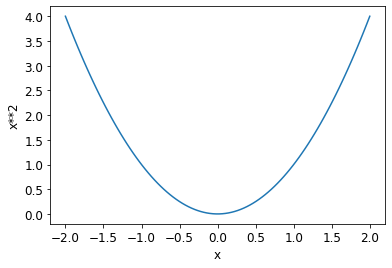

In [215]:
plot_function(f, 'x', 'x**2')

In [216]:
## Let's create gradient aware tensor
param_x = tensor(2.).requires_grad_()
param_x

tensor(2., requires_grad=True)

In [217]:
## Let's apply our function
result = f(param_x)
result

tensor(4., grad_fn=<PowBackward0>)

In [218]:
## Let's calculate gradients
result.backward()

In [219]:
## Print the calculated gradient
param_x.grad

tensor(4.)

In [220]:
## Reset the gradient, otherwise new operations will extend with the existing gradient
param_x.grad = None

In [221]:
## Access the underline tensor
## Sometimes, we need to do some operations without altering gradient.
## In that case, we can use `.data` property
param_x.data

tensor(2.)

## Calculating SGD

For that we will use 7 step process:

![](./images/sgd-7-steps.jpg)

Before we follow these steps. Let's create some data set and create a model for that.

In [222]:
x = torch.arange(0, 20).float()
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [223]:
y = 1 + torch.rand(20)*20 + (x-9.5)**2
y

tensor([104.9607,  92.6411,  65.8397,  53.1727,  38.9477,  22.9002,  28.0490,   7.3228,  19.4580,  18.7323,  20.7071,  10.8912,   9.0336,  25.4983,  36.7743,  31.2969,  50.9802,  61.2554,  82.3754,
         96.3279])

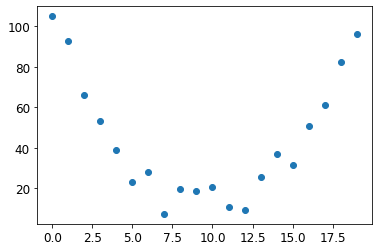

In [224]:
plt.scatter(x, y)

Basically above dataset is same as the `f(x) = x**2` with some random data into that.<br/>
Then we have some real data to apply SGD.

### Step 1: Initialization

Here we initialize weights for our expected model. For this case, we think we can fit a `quadratic` function. That is to make things simple.

In [225]:
def f(x_value, params):
    a, b, c = params;
    return a + b*x_value + c*x_value**2

In [226]:
## Initializing params
tsr_params = torch.rand(3).requires_grad_()
tsr_params

tensor([0.2956, 0.3413, 0.0248], requires_grad=True)

### Step 2: Make a Prediction

Now we are going to apply the function we define and get a result

In [227]:
preds = f(x, tsr_params)
preds

tensor([ 0.2956,  0.6617,  1.0775,  1.5431,  2.0583,  2.6232,  3.2378,  3.9021,  4.6161,  5.3797,  6.1931,  7.0562,  7.9690,  8.9314,  9.9436, 11.0055, 12.1170, 13.2783, 14.4892, 15.7499],
       grad_fn=<AddBackward0>)

In [228]:
## Let's visualize the prediction
def viz_pred():
    plt.scatter(x, y)
    plt.scatter(x, preds.data, color="red")

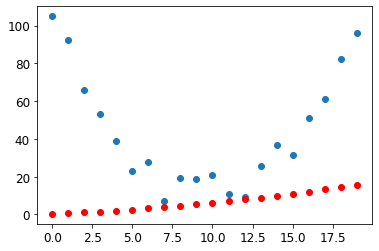

In [229]:
viz_pred()

Okay. It's bad :D <br/>
But we expected that right, since we initialize our weights randomly.

### Step 3: Find the Loss

Now we need to find a loss. It's a some sort different between real values and the prediction.
For that we are going to use `mean squired error`.

In [230]:
## create the loss function
def mse():
    return ((y - preds) ** 2).float().mean(0)

In [231]:
## get the loss
loss = mse()
loss

tensor(2280.9336, grad_fn=<MeanBackward1>)

### Step 4: Find Gradients

Here we get the prediction and apply the loss function. Now it's time to get the gradients based on those.

In [232]:
loss.backward()

In [233]:
grad = tsr_params.grad.clone()
grad

tensor([  -74.5036,  -632.2880, -9459.6152])

As you can see, now we have gradients for all three params.

In [234]:
## Let's clear the existing gradient
tsr_params.grad = None

### Step 5: Update Params with these Gradients

In [236]:
## We need to do this step slowly. So, we use a learning rate and we can learn about this later.
lr = 1e-5

In [238]:
tsr_params

tensor([0.2956, 0.3413, 0.0248], requires_grad=True)

In [239]:
## Update params
tsr_params.data = lr * grad
tsr_params

tensor([-0.0007, -0.0063, -0.0946], requires_grad=True)

Here we use `tsr_params.data` because we don't want to update gradients because of this

### Step 6: Repeat

Now we run this process multiple times.<br/>
For now, let's run it once.

In [241]:
preds = f(x, tsr_params)

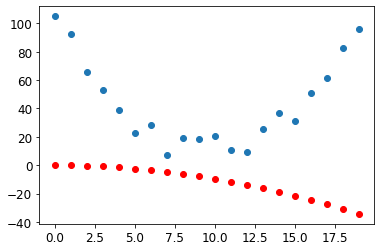

In [242]:
viz_pred()

See, it's has changed a bit.